In [1]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 9.4 MB/s eta 0:00:00


In [2]:
!pip install pytesseract

In [3]:
!pip install pillow pytesseract

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!apt-get install -y tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,170 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123597 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

Fakturnanr: INVO175257.
Bilagsdato: 17 juli 2024
Forfaldsdato: 16 august 2024
Reference: 137828


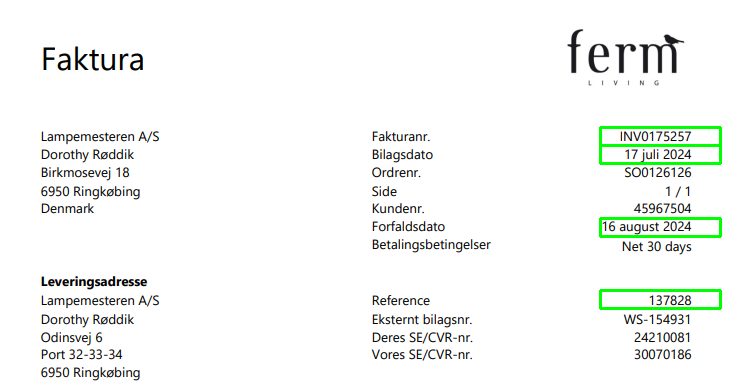

In [10]:
import re
import cv2
import pytesseract
from google.colab.patches import cv2_imshow
# Load the image
image_path = '/content/drive/MyDrive/123_invoice.PNG'  # Update this path to your image location
image = cv2.imread(image_path)

# Convert the image to grayscale (necessary for OCR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

roi_fakturnanr = (600, 127, 120, 18)  # Example coordinates (x, y, w, h)
roi_bilagsdato = (600, 145, 120, 18)
roi_forfaldsdato = (600, 218, 120, 18)
roi_reference = (600, 290, 120, 18)

# Function to extract text from ROI
def extract_text_from_roi(image, roi):
    x, y, w, h = roi
    roi_image = image[y:y+h, x:x+w]
    text = pytesseract.image_to_string(roi_image)
    return text.strip()

# Extract text from each ROI
fakturnanr_text = extract_text_from_roi(gray_image, roi_fakturnanr)
bilagsdato_text = extract_text_from_roi(gray_image, roi_bilagsdato)
forfaldsdato_text = extract_text_from_roi(gray_image, roi_forfaldsdato)
reference_text = extract_text_from_roi(gray_image, roi_reference)

# Print the extracted text
print(f"Fakturnanr: {fakturnanr_text}")
print(f"Bilagsdato: {bilagsdato_text}")
print(f"Forfaldsdato: {forfaldsdato_text}")
print(f"Reference: {reference_text}")

import numpy as np

def draw_roi(image, roi, color=(0, 255, 0)):
    x, y, w, h = roi
    image_with_roi = image.copy()
    cv2.rectangle(image_with_roi, (x, y), (x+w, y+h), color, 2)
    return image_with_roi

# Draw and display ROIs
image_with_rois = draw_roi(image, roi_fakturnanr)
image_with_rois = draw_roi(image_with_rois, roi_bilagsdato)
image_with_rois = draw_roi(image_with_rois, roi_forfaldsdato)
image_with_rois = draw_roi(image_with_rois, roi_reference)

cv2_imshow(image_with_rois)